# DEEP LEARNING P2
### Name: Aniket Raut
### Roll no. : 22
### Batch : B2


## Import libraries

In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Iris dataset

In [26]:
df = pd.read_csv('iris.csv')

## Convert class labels to numeric values

In [27]:
df['variety'] = pd.factorize(df['variety'])[0]

## Filter dataset for binary classification (Iris-setosa vs. Iris-versicolor)


In [28]:
df = df[df['variety'].isin([0, 1])]

## Select features ("sepal.length" and "sepal.width") and target variable


In [29]:
X = df[['sepal.length', 'sepal.width']]
Y = df['variety']

## Split the data into training and testing sets


In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## MP Neuron Implementation

In [31]:
class MPNeuron:
    def __init__(self):
        self.b = None

    def model(self, x):
        return (np.sum(x) >= self.b)

    def predict(self, X):
        Y = []
        for _, row in X.iterrows():
            result = self.model(row)
            Y.append(result)
        return np.array(Y)

    def fit(self, X, Y):
        accuracy = {}
        for b in range(X.shape[1] + 1):
            self.b = b
            Y_pred = self.predict(X)
            accuracy[b] = accuracy_score(Y, Y_pred)
        self.b = max(accuracy, key=accuracy.get)
        print(f"[MP Neuron] Optimal value of b: {self.b}")
        print(f"[MP Neuron] Highest accuracy on training set: {accuracy[self.b]}")

## Train and test MP Neuron model


In [32]:
print("------ MP Neuron Results ------")
mp_neuron = MPNeuron()
mp_neuron.fit(X_train, Y_train)

------ MP Neuron Results ------
[MP Neuron] Optimal value of b: 0
[MP Neuron] Highest accuracy on training set: 0.525


## Predict and evaluate on test set


In [33]:
Y_test_pred_mp = mp_neuron.predict(X_test)
accuracy_mp = accuracy_score(Y_test, Y_test_pred_mp)
print(f"[MP Neuron] Accuracy on test set: {accuracy_mp}")

[MP Neuron] Accuracy on test set: 0.4


## Perceptron Learning Algorithm Implementation

In [34]:
class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, Y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = 1 if linear_output >= 0 else 0
                update = self.learning_rate * (Y[idx] - y_pred)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, 0)

## Standardize features for Perceptron


In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train and test Perceptron model


In [36]:
perceptron = Perceptron(learning_rate=0.01, epochs=1000)
perceptron.fit(X_train_scaled, Y_train.values)

## Predict and evaluate on test set


In [37]:
Y_test_pred_perceptron = perceptron.predict(X_test_scaled)
accuracy_perceptron = accuracy_score(Y_test, Y_test_pred_perceptron)
print("------ Perceptron Results ------")
print(f"[Perceptron] Accuracy on test set: {accuracy_perceptron}")

------ Perceptron Results ------
[Perceptron] Accuracy on test set: 1.0


## Confusion matrix and classification report

In [38]:
print("Confusion Matrix (Perceptron):\n", confusion_matrix(Y_test, Y_test_pred_perceptron))
print("Classification Report (Perceptron):\n", classification_report(Y_test, Y_test_pred_perceptron))

Confusion Matrix (Perceptron):
 [[12  0]
 [ 0  8]]
Classification Report (Perceptron):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



## Visualizing Perceptron Decision Boundary

In [39]:
def plot_decision_boundary(X, Y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_predictions = model.predict(grid)
    grid_predictions = grid_predictions.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, grid_predictions, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolor='k', cmap='coolwarm')
    plt.xlabel('Sepal Length (standardized)')
    plt.ylabel('Sepal Width (standardized)')
    plt.title(title)
    plt.show()

## Combine train and test sets for visualization and Plotting decision boundary


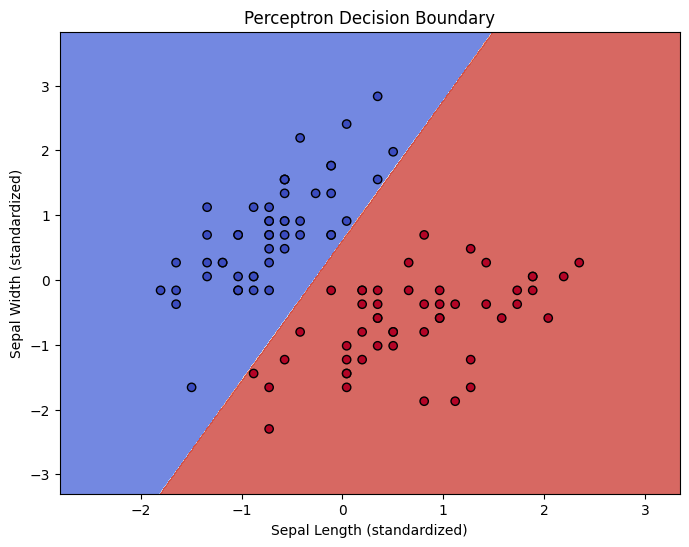

In [40]:
X_combined = np.vstack((X_train_scaled, X_test_scaled))
Y_combined = np.hstack((Y_train, Y_test))

plot_decision_boundary(X_combined, Y_combined, perceptron, "Perceptron Decision Boundary")